# Individual Assignment 2

### (Due on Sep 8 11:59PM on LumiNUS)

Student Name: Haojun Gao

Student ID: A0218869J

## Problem 1 (GrabWheels)
Towards the smart nation initiative, the Government of Singapore has encouraged sustainable and smart mobility solutions such as recent scooter vehicle sharing (e.g., GrabWheels).
Launched in the late 2018, GrabWheels rolled out around 30 parking locations in NUS Kent Ridge campus. For more details, please see http://news.nus.edu.sg/press-releases/new-e-scooter-sharing-service and https://www.grab.com/sg/wheels/.
A group of DBA5106 students is working on a project in the design and operations of GrabWheels at NUS campus, e.g., where to set up the parking locations and how many scooters to place at each location. Please answer the following questions.

#### a) Suppose GrabWheels wants to improve its service quality by optimizing parking locations and calculating the optimal number of scooters at each location. Please suggest what information would help and what data GrabWheels needs to be collected. [2 pts]


There are two ways to improve the service quality:
 - optimize the infrustructure location(optimizing parking locations)
 - solve the relocation optimization problem(cope with the problem caused by demand imbalance)
 
Therefore, from the data type point of view, both spatial data and time series time will be helpful. And if we look at the data source, shared scooter vehicle usage data(taking the vehicle as a unit can avoid the use of user data and reduce the collection of user data) and other sort of data that can affect user behavior could useful.
 - Infrustracture Information
   - Parking locations
   - Number of trips that were taken each location each day
 - Scooter Vehicle Trip Dataset
   - vehicle ID
   - trip starting time
   - trip end time
   - trip start location
   - trip end location
 - Weather Dataset
   - Temperature: basic indicator
   - Precipitation: an indicator of whether rain or not
   - Wind speed: an indicator of whether suitable for taking scooter
 - Date-related Dataset
   - holiday
   - etc.
 - Spatial Dataset
   - Topographic features of parking locations
   - Distance from the nearest parking location
   - etc.

#### b) By Sep 2019, GrabWheels has collected 2-month data (you specified in part a) from its operating 30 locations. To forecast the demand for new locations, e.g., COM2, briefly discuss which data mining task should be performed and what additional data sets should be collected, if any. [2 pts]

**Data Mining Task**

 - We could define the problem as a regression problem. 
 
 - Forecast objective is the average daily demand of a specific parking location. We could use the 2-month data mentioned above to form the variable(average demand of the parking location). And use spatial data as features to train the model.

 - The collected data could be divided into train, validate and test set to model and evaluate.

**Additional Data Sets**

 - As for the additional data sets, the relevant feature data of those new locations await predicted also need to be collected.

#### c) Following part (b), briefly discuss how GrabWheels can forecast the demand scooter sharing at new locations, using your proposed approach. Please identify which steps are the process of data mining (DM), or the use of the results of data mining (Use). [2 pts]

According to the model proposed in the previous question, we basically use the geographical characteristics to predict the use demand of this location. The basic idea is that the inherent characteristics of a place will determine,to a great extent, the demand of the scooter in this place.

For example:

 - if this place is close to the bus station or MRT, the demand for scooter may be great. 
 - If this location is close to the giant company, the demand for scooter may also be great. 
 - However,if the other/nearest parking location is far away, then one may not use scooter as the transportation.
 
**Process of Data Mining**

 - Find the feasible locations as a new parking locations.
 - Collect the geographical features of existing parking locations and feasible locations.
 - Use the existing location data to train and evaluate the model.
 - Predict the average demand of the new locations

**Knowledge Discovery and Decision Making**

 - The prediction results could be used as evidence to support or influence the company's decision.
 - The feature importance could also perform as an application for knowledge discovery, such like which feature is most relevant to the use of scooters.

#### d) Discuss what challenges GrabWheels may face and how data analytics can help improve its operations. [2 pts]

There are still many tough situations that challenge GrabWheels and also threaten their services, and demand imbalance is the most critical one among them. To a large extent, bike sharing systems are used for one-way trips, and such a trend leads toinappropriate bike distribution in time and space. Consider the scenario: 
 - Many people choose to ride to this place using the scooter, but few rides away from this place. That will cause the scooter to pile up, and the utilization rate drops sharply. 
 - Conversely, if many want to ride away meanwhile few people ride over here, this condition also results in an unsatisfactory service and leads to the low revenue.
 
To tackle this dilemma, the redistribution of bikes over stations is required. The straightforward strategy is to predict the real-time demand(hourly), rather than the average need of the parking location. Then turn the problem into a path optimization problem: how to relocate the scooter using the least human resources and finance cost.

 - The first step to optimize the relocation of scooters in the system is to be able to predict the number of scooters in a particular parking location at particular time, which can be done through the use of machine learning algorithms.

#### e) If you are evaluating the market expansion plan of GrabWheels, e.g., whether it should cover certain regions, describe what data you would like to collect and how you would like to collect and analyze them for such an evaluation? [2 pts]

When it comes to making an expansion plan, model could be level up to the region level, instead of location level. It consists on predicting the total demand of scooters in the region, both returning and renting. This model could provide general information on the number of scooter demand in a particular zones, where it is not necessary to know exactly the decision of the parking location selection.

Region level information is needed to construct the model. Such like, region area, prosperity of the region, region population, age composition of the population, etc.

Same as the above model, we could use the operation performance of the known regions to train the model and predict the performance of the unknown region. And we could use the model results to decide which region could be a target region that needs to be covered in the future.


## Problem 2 (Blue Bikes)
A renowned consulting firm MSBA & Company is currently analyzing the trip data of Blue Bikes (originally Hubway) in Boston. Blue Bikes (https://www.bluebikes.com/) is a public bike share system that operates in the Greater Boston area.

We are interested in exploring the bike share operations from the data available on https://www.bluebikes.com/system-data. We will utilize the “Bluebikes trip history data” as well as “the list of GPS coordinates and number of docks for each station” available on the website.

Please download and analyze the data to answer the following questions.
[Note: (1) the unzipped “201906-bluebikes-tripdata.zip” has a wrong file name (with correct data
  inside);
(2) you can add extension “.csv” to the unzipped “201907-bluebikes-tripdata” file]

#### 1. Provide the line chart of monthly trips from 2015-06 to 2020-05. [2 pts]

In [1]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append(
    r'D:\OneDrive\Programming\documents_python\NUS Courses\DBA5106\Course-DBA5106\assignment\IndividualAssignment2')

In [3]:
from utils.logger import logger
from utils.config import PROCESSED_DATA_DIR
from utils.data_porter import read_from_csv

In [4]:
tripdata_df = read_from_csv('tripdata.csv', PROCESSED_DATA_DIR,
                            parse_dates=['starttime', 'stoptime'])

In [5]:
tripdata_df.dtypes

tripduration                 int64
starttime           datetime64[ns]
stoptime            datetime64[ns]
start station id             int64
end station id               int64
bikeid                       int64
birth year                   int64
gender                     float64
usertype_id                  int64
dtype: object

In [6]:
tripdata_df['month'] = tripdata_df['starttime'].dt.to_period(
    'M').dt.strftime("%Y-%m")

In [7]:
tripdata_df.head(2)

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender,usertype_id,month
0,211,2015-06-01 00:07:07,2015-06-01 00:10:39,88,96,546,0,0.0,1,2015-06
1,834,2015-06-01 00:13:48,2015-06-01 00:27:43,5,12,487,1986,1.0,1,2015-06


In [8]:
month_trip = tripdata_df['month'].value_counts().sort_index()

In [74]:
x = month_trip.index.tolist()
y = month_trip.tolist()

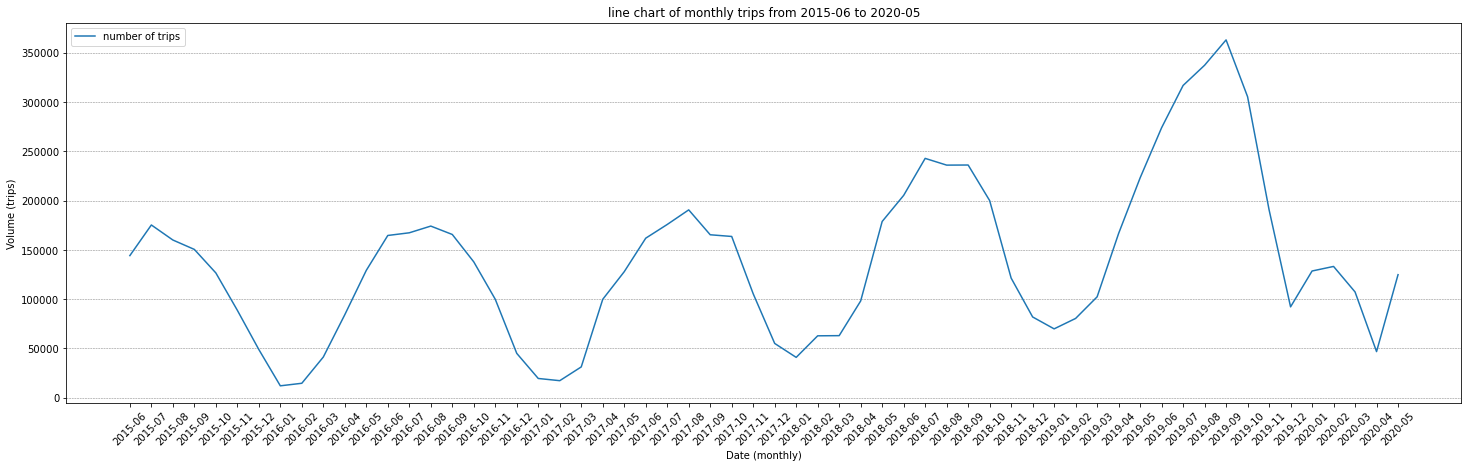

In [10]:
# month_trip.plot()
fig, ax = plt.subplots(figsize=(25, 7))
ax.plot(x, y, label='number of trips')
ax.set(xlabel='Date (monthly)', ylabel='Volume (trips)',
       title='line chart of monthly trips from 2015-06 to 2020-05')

plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(rotation='45')
plt.legend(loc='upper left')
plt.show()

#### 2. Discuss any observed patterns, e.g., trend, seasonality, and shocks. Support your argument with necessary data, if possible. [2 pts]

In [11]:
def plot_stationarity(timeseries):
    '''Plot Rolling Mean & Standard Deviation'''
    x = timeseries.index.tolist()

    # One year is used as a window, and the value of each time t is replaced by the mean of the previous 12 months (including itself)
    # and the standard deviation is the same.
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # plot rolling statistics:
    plt.subplots(figsize=(25, 7))
    plt.plot(x, timeseries.tolist(), color='blue', label='Original')
    plt.plot(x, rolmean.tolist(), color='red', label='rolling mean')
    plt.plot(x, rolstd.tolist(), color='black',
             label='Rolling standard deviation')

    plt.xticks(rotation='45')
    plt.legend(loc='upper left')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

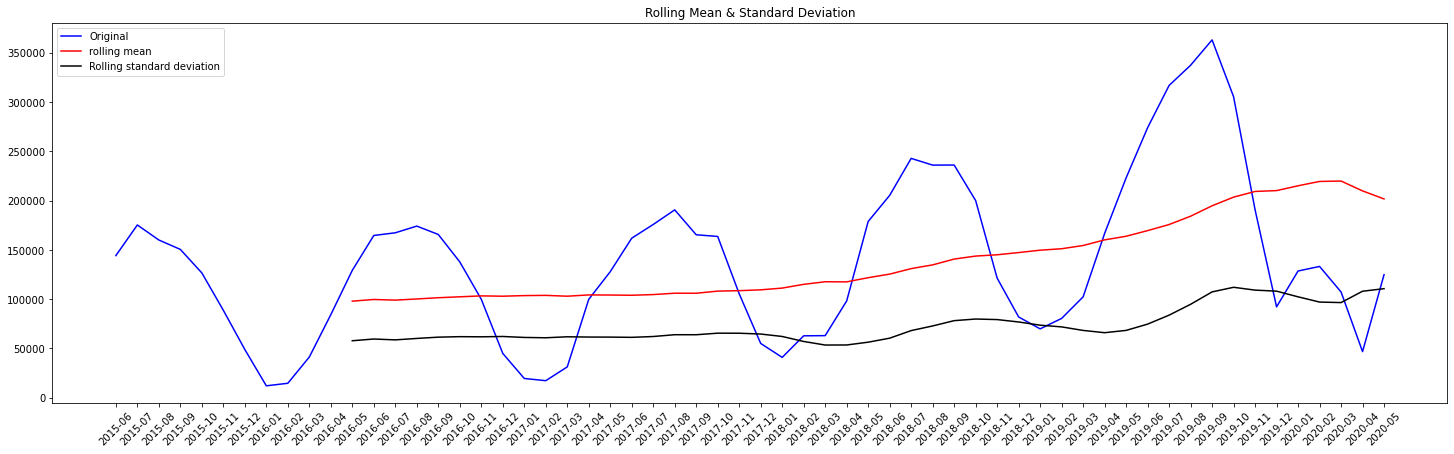

In [12]:
plot_stationarity(month_trip)

Through the above picture, we can clearly find that
 - The use of vehicles has a clear upward trend (until the beginning of 2020)
 - There is yearly seasonality (the peak is from July to September, and the trough is from November to next year February)

Check the Stationarity of time series data. Judging that the data is stable is often based on several statistics that are constant for time:
 - Constant mean
 - Constant variance
 - Time independent autocovariance

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def test_stationarity(timeseries):
    '''Dickey-Fuller test'''

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    # The output value of #dftest is Test Statistic, p-value, the number of lags, the number of observations used
    # and the critical value under each confidence level.
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' % key] = value

    print(dfoutput)

In [15]:
test_stationarity(month_trip)

Results of Dickey-Fuller Test:
Test Statistic                  0.758357
p-value                         0.990933
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical value (1%)            -3.571472
Critical value (5%)            -2.922629
Critical value (10%)           -2.599336
dtype: float64


The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.(from [statsmodel official documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html))

 - p-value
 
   - The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. In this case, the p-value is 0.99 which is a strong evidence that the null hypothesis can not be reject. In other words, the ADF test result shows that **there is a unit root**.

   - Nonstationarity can lead to spurious regression, which is an apparent relationship between variables that are not related in reality.

 - Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).
 
   - The ADF test statistic value is greater than the critical value under each significant level, this result also means: the series is not stationary.
 
Note that: The ADF test does not prove nonstationarity; it fails to prove stationarity.

In [16]:
# log transform data to make data stationary on variance
month_trip_log = np.log10(month_trip)
# Difference data to make data stationary on mean (remove trend)
month_trip_stationary = month_trip_log.diff(periods=1)[1:]

In [17]:
test_stationarity(month_trip_stationary)

Results of Dickey-Fuller Test:
Test Statistic                -5.703544e+00
p-value                        7.579024e-07
#Lags Used                     1.000000e+01
Number of Observations Used    4.800000e+01
Critical value (1%)           -3.574589e+00
Critical value (5%)           -2.923954e+00
Critical value (10%)          -2.600039e+00
dtype: float64


Difference log transform data to make data stationary on both mean and variance:

- **p-value**
 
   In this case, the p-value is almost zero which is a strong evidence that the null hypothesis can be reject. In other words, the ADF test result shows that **there isn't a unit root**.
   
- **Critical values for the test statistic**
 
   The ADF test statistic value is not greater than the critical value under each significant level, this result also means: the series is stationary.

#### 3. Implement the following forecasting methods to forecast the monthly trips from 2019-06 to 2020-05. (Note that, when forecasting for month t+1, the history from 2015-06 up to month t are available.)
#### a. Provide your forecasts using a 3-month moving average. [1 pts]

In [249]:
from scipy.special import exp10
from sklearn.metrics import mean_absolute_error as mae

In [250]:
# Define the mape matric
def mape(y_true, y_pred):
    y_true = np.array(y_true).astype(np.float64)
    y_pred = np.array(y_pred).astype(np.float64)
    if y_true.shape != y_pred.shape:
        raise ValueError(
            f"y_true and y_pred have different shape for "
            f"{y_true.shape} != {y_pred.shape}")
    return np.nanmean(np.abs((y_true - y_pred) / np.abs(y_true)))

In [251]:
def plot_forecast(df, other_info=''):
    fig, ax = plt.subplots(figsize=(25, 7))
    x = df.index.tolist()
    y_true = df['y_true'].tolist()
    y_pred = df['y_pred'].tolist()
    ax.plot(x, y_true, color='blue', label='Original')
    ax.plot(x, y_pred, color='red', label=other_info)

    ax.set_xlabel('Date (monthly)', fontsize=16)
    ax.set_ylabel('Volume (trips)', fontsize=16)
    ax.set_title(f'Frecasts using {other_info}', fontsize=20)

    ax.xaxis.set_tick_params(labelsize=16, rotation=45)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)

#     ax.xaxis.set_rotation('90')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [252]:
def moving_average_forecast(timeseries, sliding_window, start_forecast_date, end_forecast_date):
    # CHECK THE DATA PREPARATION
    if month_trip.index[0] > str(pd.to_datetime(FORCAST_START_DATE) - pd.offsets.MonthBegin(sliding_window)):
        raise Exception('In order to forecast month {}, the previous {} months data needed'.format(
            start_forecast_date, sliding_window))

    # The value of each time t is replaced by the mean of the previous N months(not including itself)
    forecast_result = timeseries.rolling(window=3).mean().shift(1)
    forecast_result = forecast_result.loc[forecast_result.index >= FORCAST_START_DATE]

    result_df = pd.DataFrame({'y_true': timeseries, 'y_pred': forecast_result})
    
    return result_df

In [353]:
def model_eval(y_ture, y_pred, start_date, end_date):
    y_ture = y_ture.loc[(y_ture.index >= start_date) &
                        (y_ture.index <= end_date)]
    y_pred = y_pred.loc[(y_pred.index >= start_date) &
                        (y_pred.index <= end_date)]
    print('MAPE: {}'.format(mape(y_ture, y_pred)))
    print('MAD: {}'.format(mae(y_ture, y_pred)))

In [320]:
FORCAST_START_DATE = '2019-06'
FORCAST_END_DATE = '2020-05'
SLIDING_WINDOW = 3

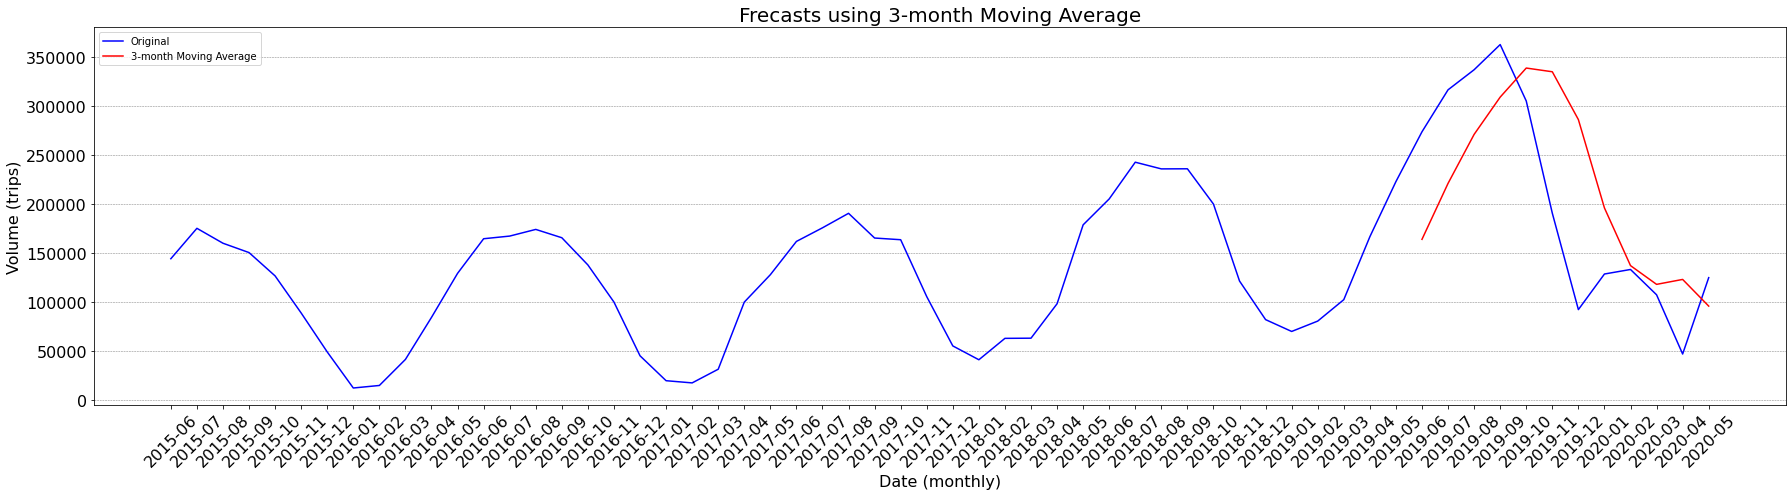

MAPE: 0.5449525413832923
MAD: 73796.66666666667


In [255]:
result_df = moving_average_forecast(timeseries=month_trip,
                                    sliding_window=SLIDING_WINDOW,
                                    start_forecast_date=FORCAST_START_DATE,
                                    end_forecast_date=FORCAST_END_DATE)
plot_forecast(result_df, other_info=f'{SLIDING_WINDOW}-month Moving Average')
model_eval(result_df['y_true'], result_df['y_pred'],start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

#### b. Provide your forecasts using exponential smoothing with a smoothing constant α=0.5. [1 pts]

In [256]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [257]:
def exponential_smoothing(timeseries, alpha, start_forecast_date, end_forecast_date):
    """Provide forecasts using exponential smoothing with a smoothing constant"""
    forecast_lst = pd.Series(pd.date_range(start_forecast_date, end_forecast_date, freq='MS').strftime("%Y-%m"))
    forecast_value = []
    for forcast_month in forecast_lst:
        timeseries_train = timeseries.loc[timeseries.index < forcast_month].tolist()
        SES_model = SimpleExpSmoothing(timeseries_train).fit(smoothing_level=alpha, optimized=False)
        forecast_value.append(SES_model.forecast(1)[0])

    SES_result = pd.Series(forecast_value, index=forecast_lst)
    result_df = pd.DataFrame({'y_true': timeseries, 'y_pred': SES_result})
    return result_df

In [258]:
SES_ALPHA = 0.5

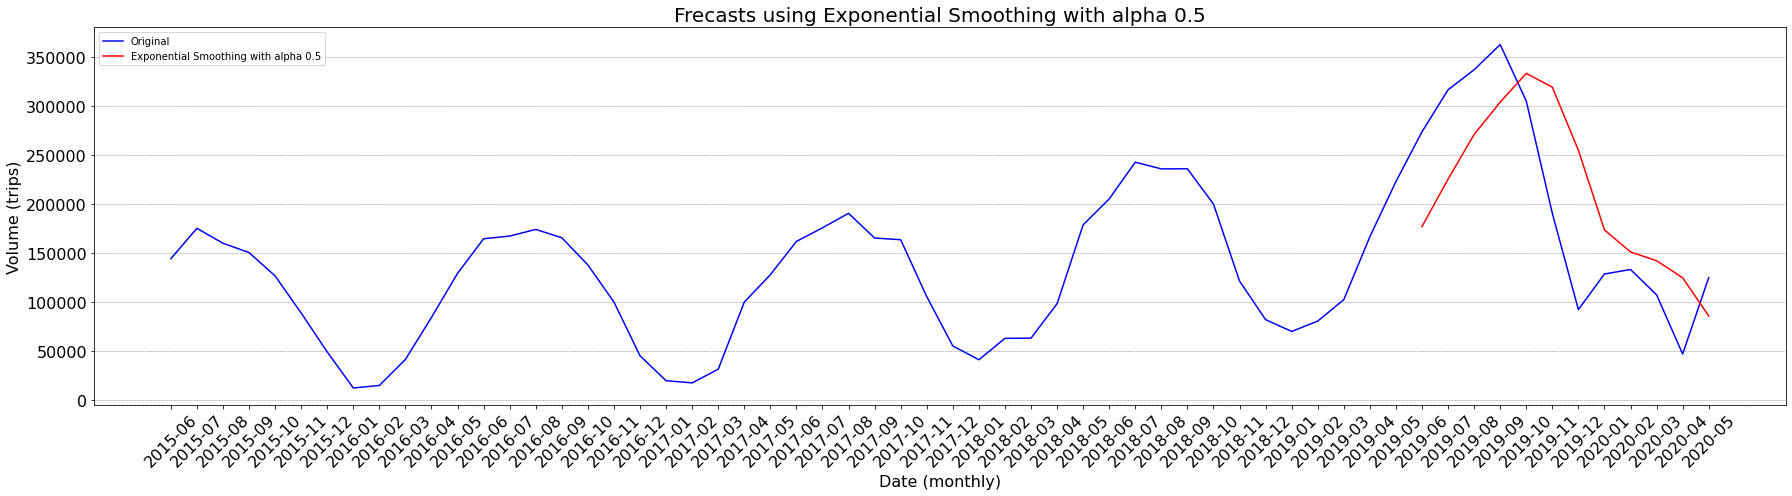

MAPE: 0.5270872736829372
MAD: 70695.29033772778


In [259]:
result_df = exponential_smoothing(timeseries=month_trip,
                                  alpha=SES_ALPHA,
                                  start_forecast_date=FORCAST_START_DATE,
                                  end_forecast_date=FORCAST_END_DATE)
plot_forecast(result_df, other_info=f'Exponential Smoothing with alpha {SES_ALPHA}')
model_eval(result_df['y_true'], result_df['y_pred'],start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

#### c. Provide your forecasts using Holt's method with α=0.3 and β=0.1. [1 pts]

In [260]:
from statsmodels.tsa.api import Holt

In [261]:
def holt_method(timeseries, alpha, beta, start_forecast_date, end_forecast_date):
    """Provide forecasts using Holt's method with alpha and beta"""
    forecast_lst = pd.Series(pd.date_range(
        start_forecast_date, end_forecast_date, freq='MS').strftime("%Y-%m"))
    forecast_value = []
    for forcast_month in forecast_lst:
        timeseries_train = timeseries.loc[timeseries.index < forcast_month].tolist()
        Holter_model = Holt(timeseries_train).fit(
        smoothing_level=alpha, smoothing_slope=beta, optimized=False)
        forecast_value.append(Holter_model.forecast(1)[0])
        
    Holter_result = pd.Series(forecast_value, index=forecast_lst)
    result_df = pd.DataFrame({'y_true': timeseries, 'y_pred': Holter_result})
    return result_df

In [262]:
HOLT_ALPHA = 0.3
HOLT_BETA = 0.1

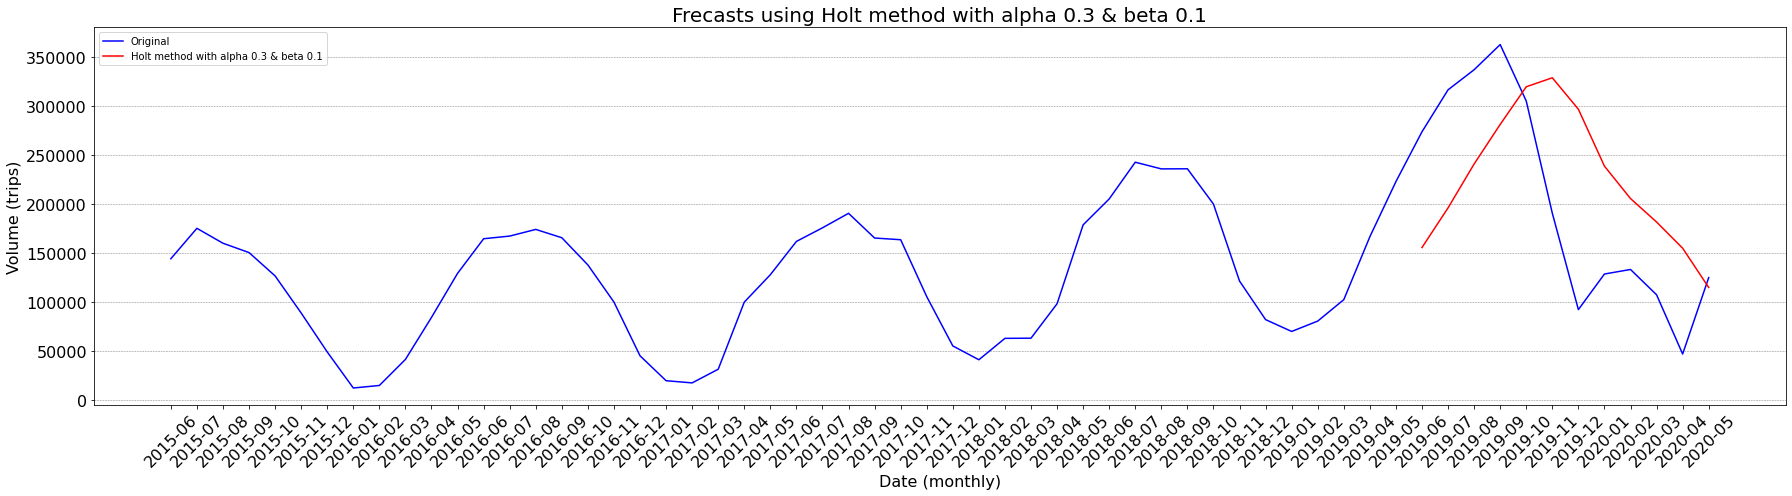

MAPE: 0.7338497610269354
MAD: 95866.41657870775


In [263]:
result_df = holt_method(timeseries=month_trip,
                        alpha=HOLT_ALPHA,
                        beta=HOLT_BETA,
                        start_forecast_date=FORCAST_START_DATE,
                        end_forecast_date=FORCAST_END_DATE)
plot_forecast(result_df,other_info=f'Holt method with alpha {HOLT_ALPHA} & beta {HOLT_BETA}')
model_eval(result_df['y_true'], result_df['y_pred'],start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

#### d. Plot the forecasts from all three methods above in the line chart, together with the actual trips for the periods 2019-06 to 2020-05. [1 pts]

In [269]:
def plot_all_method(full_results):
    fig, ax = plt.subplots(figsize=(25, 7))
    x = full_results.index.tolist()

    ax.plot(x, full_results['y_true'].tolist(), color='blue',label='Original')
    ax.plot(x, full_results['y_pred_ma'].tolist(), color='red',label='y_pred_ma')
    ax.plot(x, full_results['y_pred_es'].tolist(), color='orange',label='y_pred_es')
    ax.plot(x, full_results['y_pred_hm'].tolist(), color='green',label='y_pred_hm')

    ax.set_xlabel('Date (monthly)', fontsize=16)
    ax.set_ylabel('Volume (trips)', fontsize=16)
    ax.set_title(f'Frecasts using all three methods', fontsize=20)

    ax.xaxis.set_tick_params(labelsize=16, rotation=45)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)

    #     ax.xaxis.set_rotation('45')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

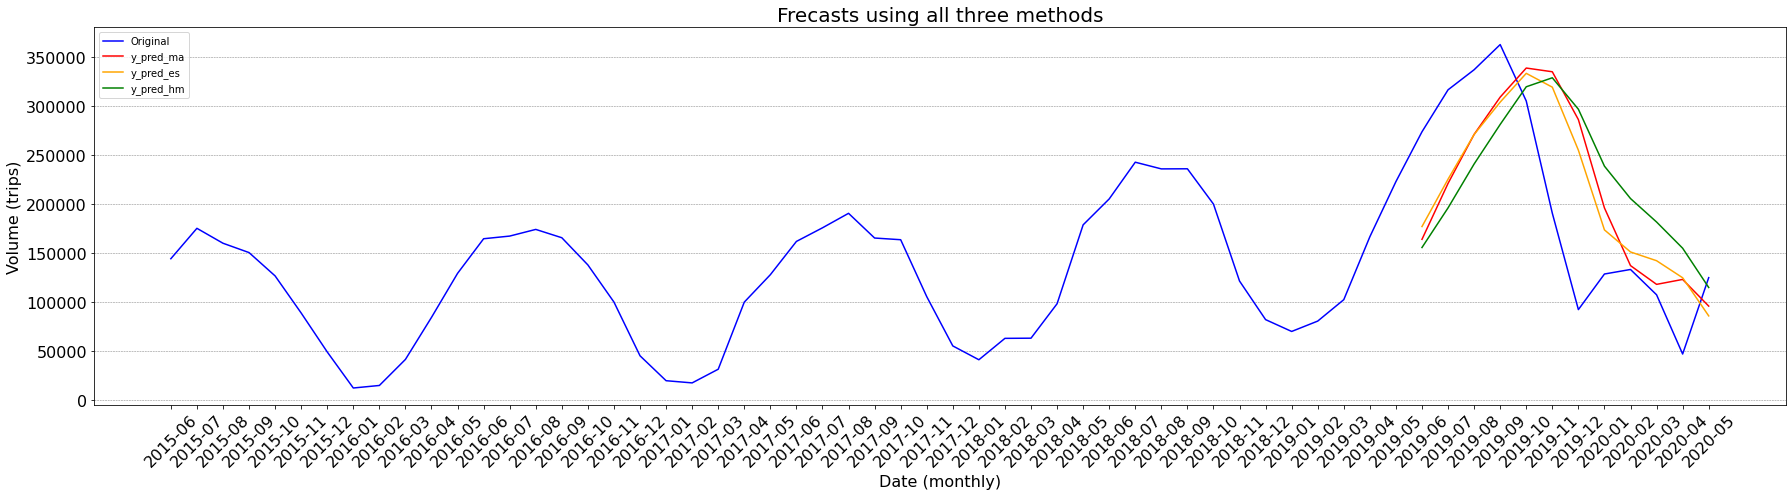

In [271]:
ma_result = moving_average_forecast(
    timeseries=month_trip, sliding_window=SLIDING_WINDOW,
    start_forecast_date=FORCAST_START_DATE,
    end_forecast_date=FORCAST_END_DATE)
ma_result.rename(columns={'y_pred': 'y_pred_ma'}, inplace=True)

es_result = exponential_smoothing(
    timeseries=month_trip, alpha=SES_ALPHA,
    start_forecast_date=FORCAST_START_DATE,
    end_forecast_date=FORCAST_END_DATE)
es_result.rename(columns={'y_pred': 'y_pred_es'}, inplace=True)

hm_result = holt_method(
    timeseries=month_trip, alpha=HOLT_ALPHA, beta=HOLT_BETA,
    start_forecast_date=FORCAST_START_DATE,
    end_forecast_date=FORCAST_END_DATE)
hm_result.rename(columns={'y_pred': 'y_pred_hm'}, inplace=True)

full_results = pd.merge(ma_result, es_result['y_pred_es'],
                        left_index=True, right_index=True)
full_results = pd.merge(full_results, hm_result['y_pred_hm'],
                        left_index=True, right_index=True)

plot_all_method(full_results)

#### e. Evaluate the above forecasting methods using MAD (Mean Absolute Deviation) and MAPE, respectively. [1 pts]

In [266]:
print('******** MOVING AVERAGE ********')
model_eval(full_results['y_true'], full_results['y_pred_ma'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

print('\n******** EXPONENTIAL SMOOTHING ********')
model_eval(full_results['y_true'], full_results['y_pred_es'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

print('\n******** HOLT METHOD ********')
model_eval(full_results['y_true'], full_results['y_pred_hm'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

******** MOVING AVERAGE ********
MAPE: 0.5449525413832923
MAD: 73796.66666666667

******** EXPONENTIAL SMOOTHING ********
MAPE: 0.5270872736829372
MAD: 70695.29033772778

******** HOLT METHOD ********
MAPE: 0.7338497610269354
MAD: 95866.41657870775


#### f. Discuss the performance of the forecasting methods, e.g., any suggestions for improvement. [1 pts]

 - We can observe that the three methods have the same delay relative to the real situation. This delay is most likely due to seasonality.

 - Suggestions for improvement: transform the original data, using the difference and log method. Carry out stationarity test to verify the stationarity of the time series.

 - In this case(using stationary data), we need to covert the forecast on differenced data to non-differenced data forecast.

In [221]:
def recover_origin(ts, ts_log, ts_stationary_pred, forcast_start_date, pred_type):
    """Predicted values need to be restored by the relevant inverse transformation."""
    ts_stationary_pred = ts_stationary_pred.dropna()
    if pred_type == "daily":
        origin_index = (pd.to_datetime(forcast_start_date) - pd.offsets.DateOffset(1)).strftime("%Y-%m-%d")
        origin_num = ts_log[origin_index]
    elif pred_type == 'monthly':
        origin_index = (pd.to_datetime(forcast_start_date) - pd.offsets.MonthBegin(1)).strftime("%Y-%m")
        origin_num = ts_log[origin_index]
    else:
        raise Exception
    # Recover the first-order difference
    diff_restored = pd.Series(origin_num, index=[origin_index]).append(ts_stationary_pred).cumsum()
    
    # recover the log transformation
    log_recover = 10 ** diff_restored
    log_recover = log_recover.astype(int)
    
    # concatenate the result 
    result = pd.concat([ts, log_recover], axis=1)
    result.columns = ['y_true', 'y_pred']
    return result

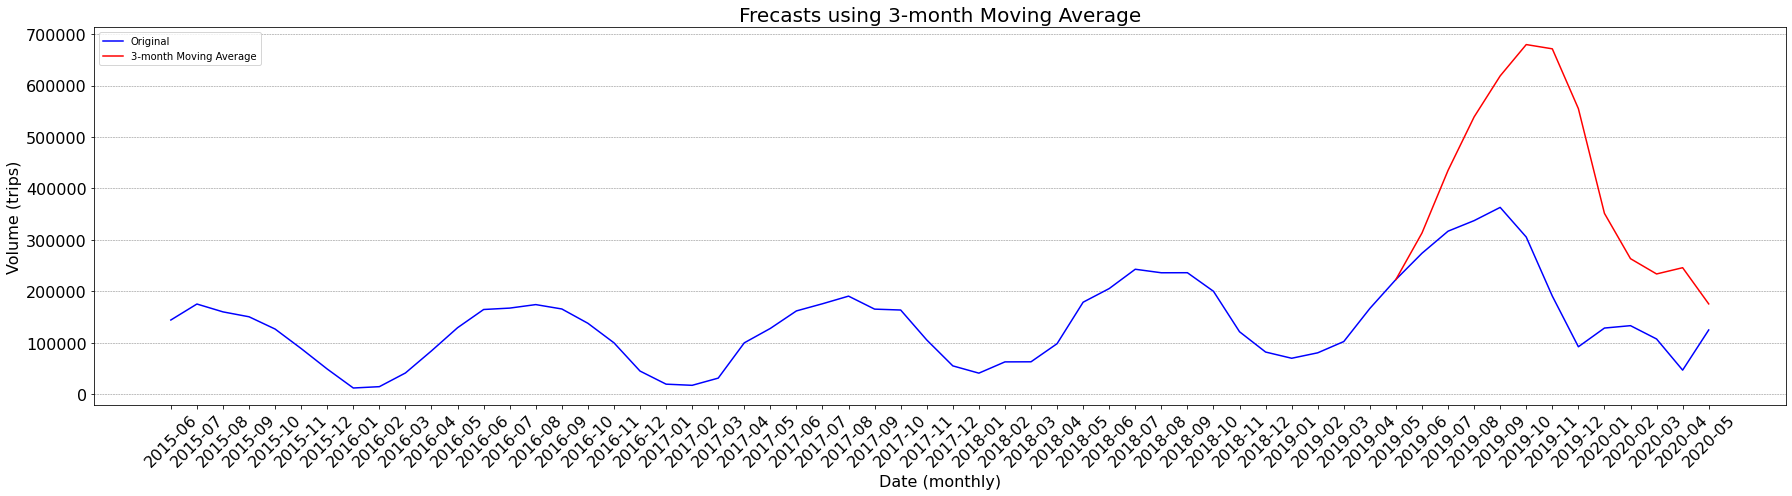

MAPE: 1.5944921516090218
MAD: 221843.16666666666


In [163]:
station_result_df = moving_average_forecast(timeseries=month_trip_stationary,
                                    sliding_window=SLIDING_WINDOW,
                                    start_forecast_date=FORCAST_START_DATE,
                                    end_forecast_date=FORCAST_END_DATE)

result_df = recover_origin(month_trip, month_trip_log, station_result_df['y_pred'], FORCAST_START_DATE, pred_type='monthly')
plot_forecast(result_df, other_info=f'{SLIDING_WINDOW}-month Moving Average')
model_eval(result_df['y_true'], result_df['y_pred'],start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

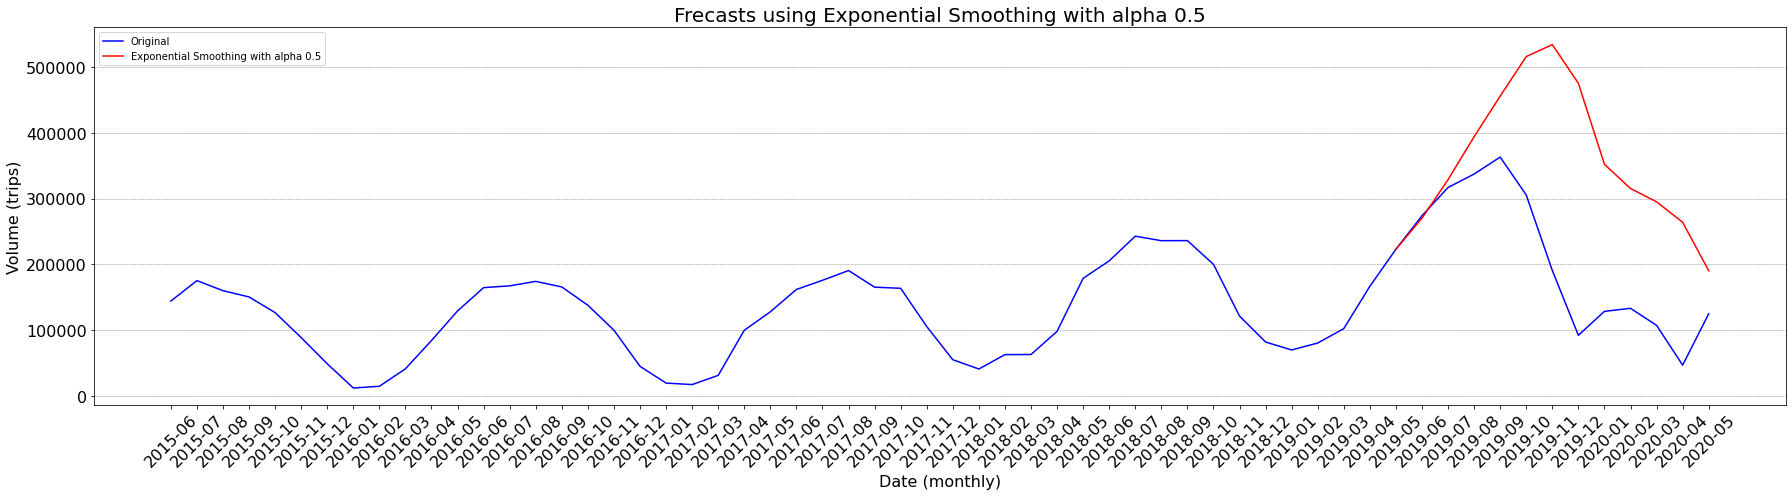

MAPE: 1.4285772827330065
MAD: 164884.41666666666


In [267]:
station_result_df = exponential_smoothing(timeseries=month_trip_stationary,
                                          alpha=ALPHA,
                                          start_forecast_date=FORCAST_START_DATE,
                                          end_forecast_date=FORCAST_END_DATE)
result_df = recover_origin(month_trip, month_trip_log, station_result_df['y_pred'], 
                           FORCAST_START_DATE, pred_type='monthly')
plot_forecast(result_df, 
              other_info=f'Exponential Smoothing with alpha {SES_ALPHA}')
model_eval(result_df['y_true'], result_df['y_pred'],start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

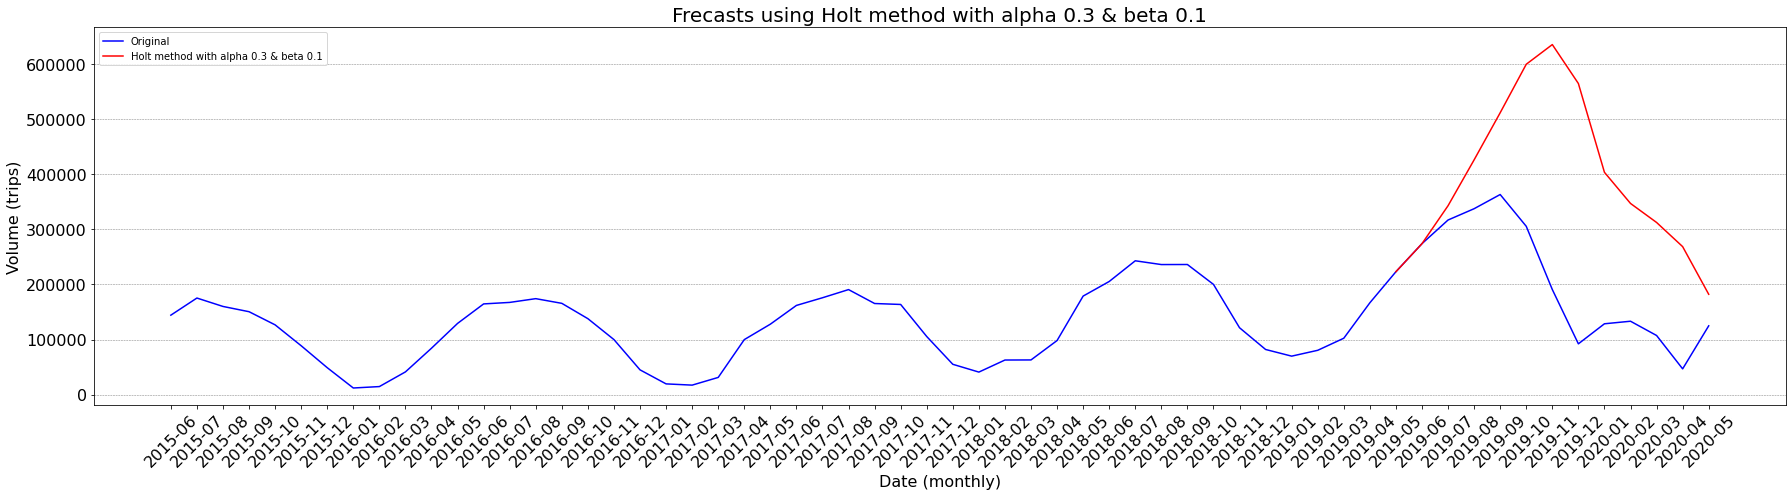

MAPE: 1.6684936030127824
MAD: 203917.75


In [268]:
station_result_df = holt_method(timeseries=month_trip_stationary,
                        alpha=ALPHA,
                        beta=BETA,
                        start_forecast_date=FORCAST_START_DATE,
                        end_forecast_date=FORCAST_END_DATE)
result_df = recover_origin(month_trip, month_trip_log, station_result_df['y_pred'], FORCAST_START_DATE, pred_type='monthly')
plot_forecast(result_df,other_info=f'Holt method with alpha {HOLT_ALPHA} & beta {HOLT_BETA}')
model_eval(result_df['y_true'], result_df['y_pred'],start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

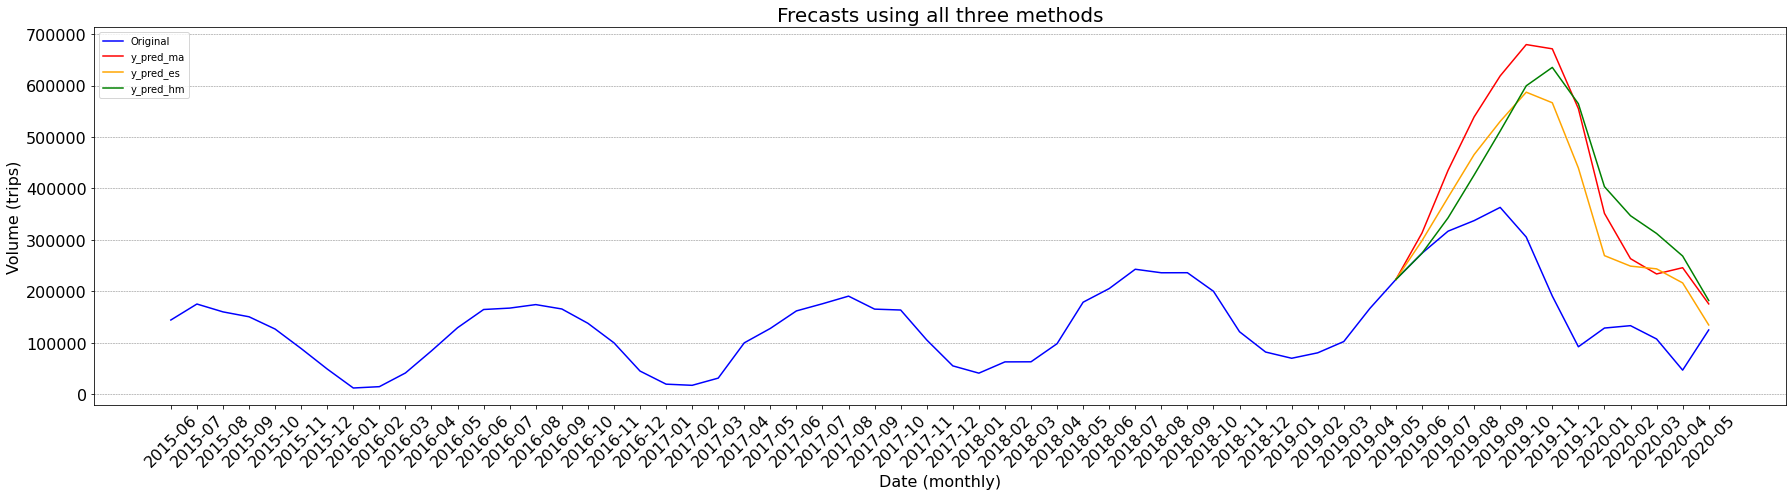

In [272]:
ma_station_result = moving_average_forecast(
    timeseries=month_trip_stationary, sliding_window=SLIDING_WINDOW,
    start_forecast_date=FORCAST_START_DATE,
    end_forecast_date=FORCAST_END_DATE)
ma_result = recover_origin(month_trip, month_trip_log, ma_station_result['y_pred'], FORCAST_START_DATE, pred_type='monthly')
ma_result.rename(columns={'y_pred': 'y_pred_ma'}, inplace=True)

es_station_result = exponential_smoothing(
    timeseries=month_trip_stationary, alpha=SES_ALPHA,
    start_forecast_date=FORCAST_START_DATE,
    end_forecast_date=FORCAST_END_DATE)
es_result = recover_origin(month_trip, month_trip_log, es_station_result['y_pred'], FORCAST_START_DATE, pred_type='monthly')
es_result.rename(columns={'y_pred': 'y_pred_es'}, inplace=True)

hm_station_result = holt_method(
    timeseries=month_trip_stationary, alpha=HOLT_ALPHA, beta=HOLT_BETA,
    start_forecast_date=FORCAST_START_DATE,
    end_forecast_date=FORCAST_END_DATE)
hm_result = recover_origin(month_trip, month_trip_log, hm_station_result['y_pred'], FORCAST_START_DATE, pred_type='monthly')
hm_result.rename(columns={'y_pred': 'y_pred_hm'}, inplace=True)

full_results = pd.merge(ma_result, es_result['y_pred_es'],
                        left_index=True, right_index=True)
full_results = pd.merge(full_results, hm_result['y_pred_hm'],
                        left_index=True, right_index=True)

plot_all_method(full_results)

In [273]:
print('******** MOVING AVERAGE ********')
model_eval(full_results['y_true'], full_results['y_pred_ma'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

print('\n******** EXPONENTIAL SMOOTHING ********')
model_eval(full_results['y_true'], full_results['y_pred_es'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

print('\n******** HOLT METHOD ********')
model_eval(full_results['y_true'], full_results['y_pred_hm'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

******** MOVING AVERAGE ********
MAPE: 1.5944921516090218
MAD: 221843.16666666666

******** EXPONENTIAL SMOOTHING ********
MAPE: 1.2278635356494478
MAD: 163576.33333333334

******** HOLT METHOD ********
MAPE: 1.6684936030127824
MAD: 203917.75


 - Through the analysis of the results, the result of using the stationary sequence to predict is worse than that of the original sequence. 
 - But it does eliminate the delay that appeared before.
 - Part of the reason why the result became worse is that none of the three methods can completely eliminate the upward trend of the sequence, and the use of exponents when restoring the original sequence may amplify this defect.

#### 4. Use the histories from 2015-06 to 2019-05 to forecast the monthly trips from 2019-06 to 2020-05 using Holt-Winters' method and ARIMA.
#### a. Show the time series decomposition for periods 2015-06 to 2019-05 to identify trend and seasonality, if any. [1 pt]


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

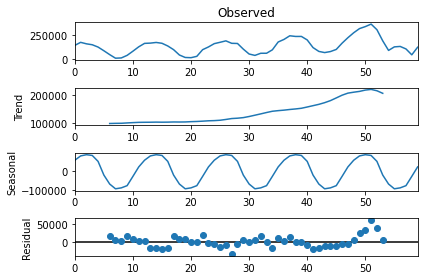

In [39]:
result = seasonal_decompose(month_trip.tolist(), model='additive', period=12)
result.plot()
plt.show()

The results here are consistent with the previous analysis:
 - The use of vehicles has a clear upward trend (until the beginning of 2020)
 - There is yearly seasonality (the peak is from July to September, and the trough is from November to next year February)

#### b. Provide your forecasts using Holt-Winters' method. [2 pts]


In [40]:
from statsmodels.tsa.api import ExponentialSmoothing

In [321]:
def holt_winters_method(timeseries, start_forecast_date, end_forecast_date):
    timeseries_train = timeseries.loc[timeseries.index < start_forecast_date]
    timeseries_forecast = timeseries.loc[timeseries.index >=
                                         start_forecast_date]
    step_num = len(timeseries_forecast)

    # to silence the ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
    timeseries_train.index = pd.DatetimeIndex(
        timeseries_train.index.values, freq='MS')

    ES_model = ExponentialSmoothing(
        timeseries_train, trend='add', seasonal='add', seasonal_periods=12).fit()
    print(ES_model.summary())

    ES_model = ES_model.forecast(step_num)
    ES_model.index = ES_model.index.strftime("%Y-%m")

    result_df = pd.DataFrame({'y_true': timeseries, 'y_pred': ES_model})

    return result_df

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                     6994258936.595
Optimized:                         True   AIC                            934.263
Trend:                         Additive   BIC                            964.203
Seasonal:                      Additive   AICC                           957.850
Seasonal Periods:                    12   Date:                 Tue, 15 Sep 2020
Box-Cox:                          False   Time:                         01:15:01
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5525095                alpha                 True
smoothing_slope          

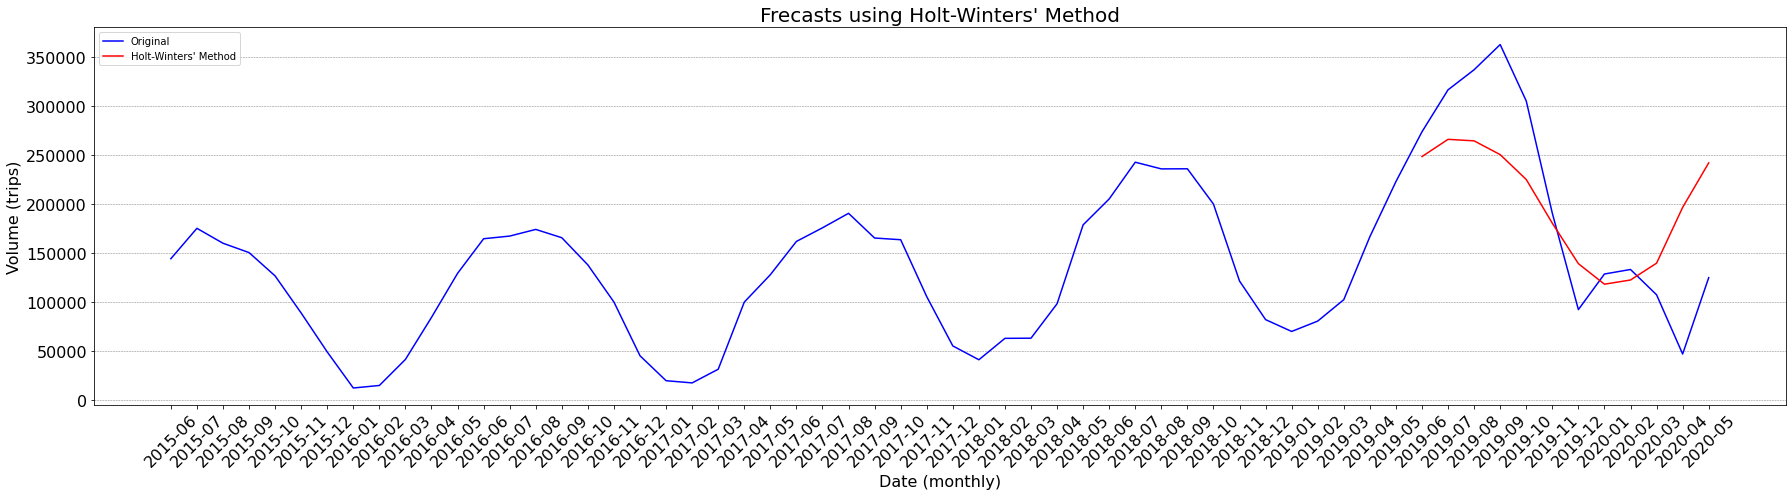

MAPE: 0.5174405163453567
MAD: 59948.10268166926


In [322]:
result_df = holt_winters_method(timeseries=month_trip,
                                start_forecast_date=FORCAST_START_DATE,
                                end_forecast_date=FORCAST_END_DATE)
plot_forecast(result_df, other_info="Holt-Winters' Method")
model_eval(result_df['y_true'], result_df['y_pred'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

#### c. Identification of best fit ARIMA model. Explain the resulting model, e.g., any (seasonal) differencing. [2 pts]


In [323]:
import pmdarima as pm

In [324]:
model = pm.auto_arima(month_trip, seasonal = True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -705.009
Date:                Tue, 15 Sep 2020   AIC                           1418.019
Time:                        01:15:21   BIC                           1426.396
Sample:                             0   HQIC                          1421.296
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.113e+04   9008.530      3.455      0.001    1.35e+04    4.88e+04
ar.L1          1.4408      0.080     18.018      0.000       1.284       1.598
ar.L2         -0.6638      0.091     -7.285      0.0

 - A model with (only) two AR terms would be specified as an ARIMA of order (2,0,0).
 - The SARIMA extension of ARIMA that explicitly models the seasonal element in univariate data. And there is no seasonal order taken into the model.

#### d. Plot ACF and PACF of fitted residuals to verify whether there is MA/AR effect left. [1 pt]

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

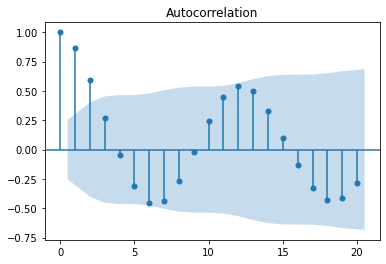

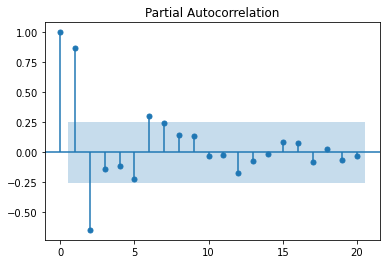

In [276]:
# plot original time series
plot_acf(month_trip.tolist(), lags=20)
plt.show()
# set method to silence RuntimeWarning
plot_pacf(month_trip.tolist(), lags=20, method='ywm')
plt.show()

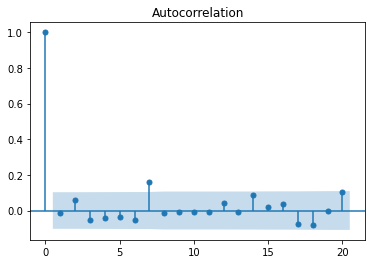

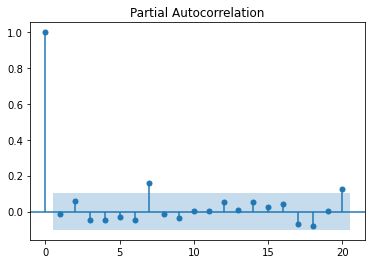

In [274]:
# plot residual
plot_acf(model.resid(), lags=20)
plt.show()
plot_pacf(model.resid(), lags=20, method='ywm')
plt.show()

#### e.Forecast the trips for 2019-06 to 2020-05 using the best fit ARIMA model and plot the predictions with 95% confidence intervals. [2 pts]


In [47]:
def arima_forecast(timeseries, start_forecast_date, end_forecast_date):

    # Load/split data
    timeseries_train = timeseries.loc[timeseries.index < start_forecast_date]
    timeseries_forecast = timeseries.loc[(timeseries.index >= start_forecast_date) &
                                         (timeseries.index <= end_forecast_date)]
    step_num = len(timeseries_forecast)

    # Fit model
    model = pm.auto_arima(timeseries_train, seasonal=True,
                          m=12, suppress_warnings=True)  # m=seasonal length

    # make forecasts
    # predict N steps into the future
    pred, conf = model.predict(step_num, return_conf_int=True, alpha=0.05)

    model_df = pd.DataFrame()
    model_df['lower_bounds'] = [i[0] for i in conf]
    model_df['upper_bounds'] = [i[1] for i in conf]
    model_df['y_pred'] = list(pred)
    model_df.index = pd.Series(pd.date_range(
        start_forecast_date, end_forecast_date, freq='MS').strftime("%Y-%m"))

    result_df = pd.merge(left=pd.DataFrame(month_trip).rename(columns={'month': 'y_true'}),
                         right=model_df, how='left', right_index=True, left_index=True)

    return result_df, model

In [280]:
def arima_plot(arima_result, title):
    fig, ax = plt.subplots(figsize=(25, 7))
    x = arima_result.index.tolist()
    ax.plot(x, arima_result['y_true'].tolist(), color='blue',
            label='Original')
    ax.plot(x, arima_result['y_pred'].tolist(), color='red',
            label='prediction')
    ax.plot(x, arima_result['lower_bounds'].tolist(), color='orange',
            label='Lower Bounds')
    ax.plot(x, arima_result['upper_bounds'].tolist(), color='green',
            label='Upper Bounds')
    
    ax.fill_between(x,arima_result['lower_bounds'],arima_result['upper_bounds'],facecolor='silver')


    ax.set_xlabel('Date (monthly)', fontsize=16)
    ax.set_ylabel('Volume (trips)', fontsize=16)
    ax.set_title(title, fontsize=20)

    ax.xaxis.set_tick_params(labelsize=16, rotation=45)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)

    #     ax.xaxis.set_rotation('45')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

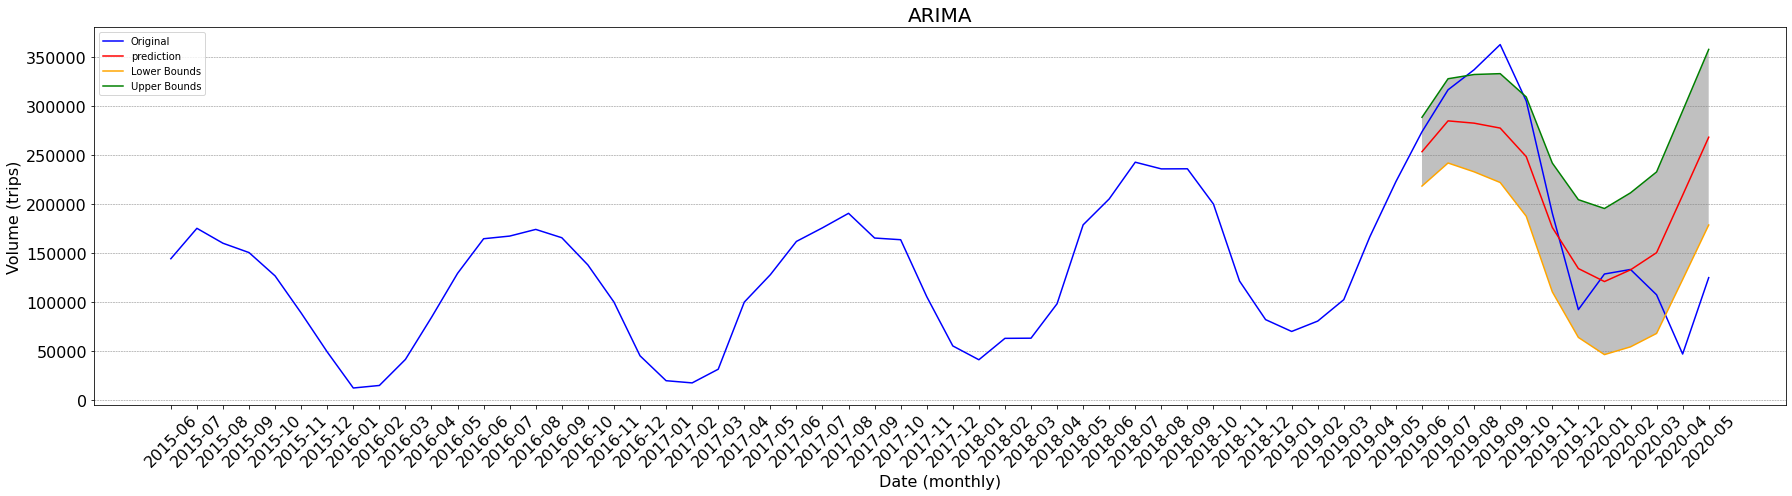

MAPE: 0.5310480887395453
MAD : 55215.56640086445


In [281]:
result_df, model = arima_forecast(timeseries=month_trip,
                           start_forecast_date=FORCAST_START_DATE,
                           end_forecast_date=FORCAST_END_DATE)
arima_plot(result_df, title='ARIMA')
model_eval(result_df['y_true'], result_df['y_pred'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

#### 5. Focus on the trip data from 2019-01 to 2019-12 only. Now the client of MSBA &Company wants to understand the key factors that affects the total daily ridership in the studied periods. Please explore auxiliary data sets and discuss your findings. [3 pts] 
[Hint: Weather data: https://www.meteoblue.com/en/weather/archive/era5/boston_united-states-of-america_4930956 . Students are also encouraged to explore other auxiliary data source]

Features:
 - Weather Dataset
   - Temperature: basic indicator
   - Precipitation: an indicator of whether rain or not
   - Wind speed: an indicator of whether suitable for taking scooter
 - Date-related Dataset
   - holiday
   - etc.

In [332]:
# Set hyper parameter
TRAIN_START_DATE = '2019-01-01'
FORCAST_START_DATE = '2019-10-01'
FORCAST_END_DATE = '2019-12-31'

In [333]:
tripdata_df['datetime'] = tripdata_df['starttime'].dt.strftime("%Y-%m-%d")
tripdata_used = tripdata_df.loc[(tripdata_df['datetime'] >= TRAIN_START_DATE) &
                                (tripdata_df['datetime'] <= FORCAST_END_DATE)]

In [334]:
daily_trip = tripdata_used['datetime'].value_counts().sort_index()

In [335]:
daily_trip_df = pd.DataFrame(daily_trip).rename(columns={'datetime': 'y_true'})
daily_trip_df['datetime'] = pd.to_datetime(daily_trip_df.index)
daily_trip_df = daily_trip_df.reset_index(drop=True)

In [336]:
weather_data = read_from_csv('weather_data.csv', PROCESSED_DATA_DIR,
                             parse_dates=['datetime'])
weather_data['datetime'] = weather_data['datetime']

In [337]:
dataset = pd.merge(left=daily_trip_df, right=weather_data,
                   on='datetime', how='inner')

In [338]:
# Add Date-related Features
dataset['day'] = dataset['datetime'].dt.strftime("%d").astype(int)
dataset['dayofweek'] = dataset['datetime'].dt.dayofweek
dataset['is_workday'] = dataset['dayofweek'].apply(
    lambda x: 1 if x <= 4 else 0)

In [339]:
import holidays
from datetime import date

In [340]:
us_holidays = holidays.UnitedStates()
dataset['is_holiday'] = dataset['datetime'].apply(
    lambda x: 1 if x in us_holidays else 0)

In [341]:
dataset.head()

,y_true,datetime,Temperature_Minimum,Temperature_Maximum,Temperature_Mean,RelativeHumidity_Minimum,RelativeHumidity_Maximum,RelativeHumidity_Mean,MeanSeaLevelPressure_Minimum,MeanSeaLevelPressure_Maximum,...,WindSpeed_Maximum,WindSpeed_Mean,WindDirection Dominant_None,GeopotentialHeight_Minimum,GeopotentialHeight_Maximum,GeopotentialHeight_Mean,day,dayofweek,is_workday,is_holiday
0,1305,2019-01-01,2.348312,13.128311,7.768727,49.318592,95.652000,71.862465,997.7,1018.1,...,31.780067,23.699722,261.37690,-18,144,55.916668,1,1,1,1
1,2632,2019-01-02,-2.821688,1.618311,-0.883772,31.418629,67.223060,48.663450,1018.7,1027.7,...,14.512064,10.105483,339.22775,149,216,193.750000,2,2,1,0
2,3005,2019-01-03,-1.311689,6.968312,2.654561,57.154278,88.330734,71.750340,1009.3,1022.3,...,16.793140,11.653485,245.04233,75,176,109.000000,3,3,1,0
3,3397,2019-01-04,-0.161688,7.998312,3.625811,48.568703,73.006860,63.310513,1009.5,1015.1,...,18.075441,12.926744,225.24014,77,120,98.916664,4,4,1,0
4,786,2019-01-05,1.728312,5.048312,3.663312,70.087240,93.792020,88.568260,998.5,1008.7,...,17.727943,10.884510,352.37183,-12,70,24.541666,5,5,0,0


SARIMAX is like a complicated version of ARIMA. Optimal values of p, d, and q can be searched via a loop and grid search, as well as the seasonal values for p, d, and q. And also there could add more parameters in the SARIMAX function.

In [342]:
import statsmodels.api as sm

In [371]:
def sarimax_forecast(df, exog_lst, start_forecast_date, end_forecast_date):

    # Load/split data
    df_train = df.loc[df['datetime'] < start_forecast_date]
    df_forecast = df.loc[(df['datetime'] >= start_forecast_date) &
                         (df['datetime'] <= end_forecast_date)]

    step_num = len(df_forecast)

    # Split the observed time-series and exogenous regressors
    endog_train = df_train['y_true']
    endog_forecast = df_forecast['y_true']
    exog_train = df_train[exog_lst]
    exog_forecast = df_forecast[exog_lst]

    # Fit model
    # Make forecasts
    if len(exog_lst):
        model = sm.tsa.statespace.SARIMAX(endog=endog_train, exog=exog_train,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        model = model.fit(maxiter=1000, warn_convergence=False)
        forecast = model.get_forecast(steps=step_num, exog=exog_forecast)
    else:
        model = sm.tsa.statespace.SARIMAX(endog=endog_train,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        model = model.fit(maxiter=1000, warn_convergence=False)
        forecast = model.get_forecast(steps=step_num)

    forecast_interval = forecast.conf_int()
    y_pred = forecast.predicted_mean
    pred_all = pd.concat([y_pred, forecast_interval], axis=1)
    pred_all.columns = ['y_pred', 'lower_bounds', 'upper_bounds']
    pred_all['datetime'] = pd.date_range(
        start_forecast_date, end_forecast_date, freq='D')

    result_df = pd.merge(left=df[['y_true', 'datetime']],
                         right=pred_all, how='left', on='datetime')
    result_df.index = result_df['datetime']

    return result_df, model

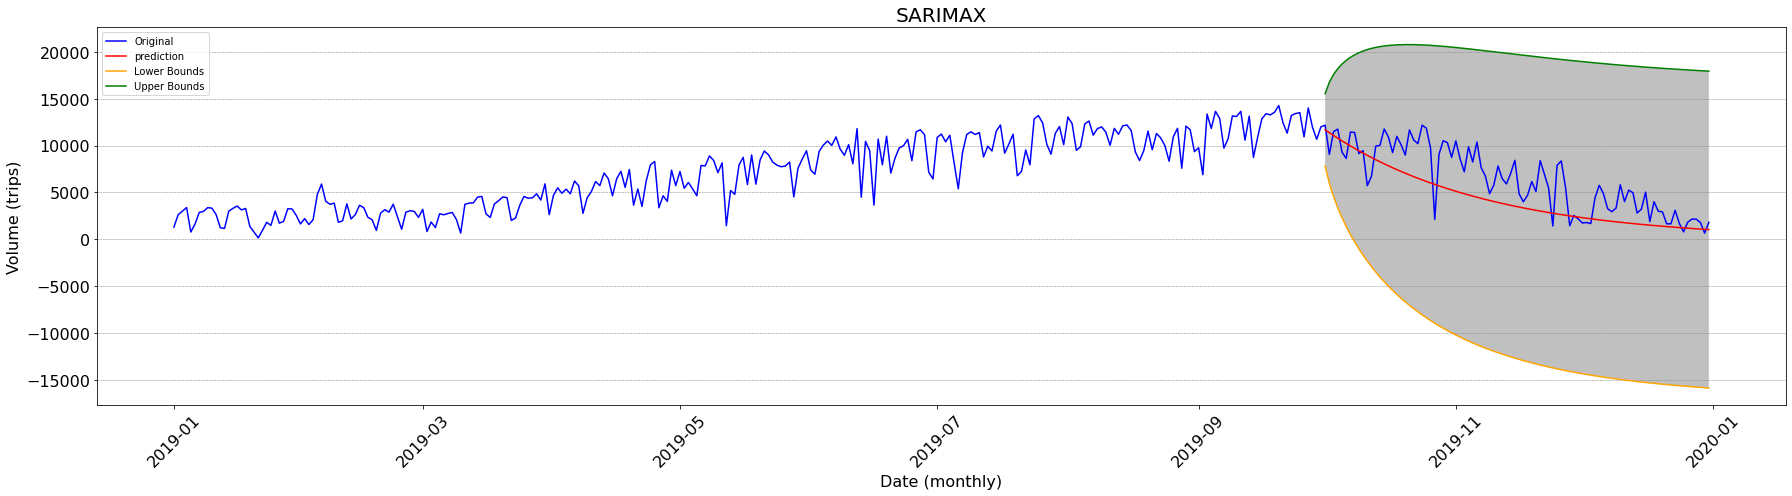

MAPE: 0.40792774715829755
MAD: 2389.541413092803


In [372]:
result_df, model = sarimax_forecast(df=dataset, exog_lst=[],
                                    start_forecast_date=FORCAST_START_DATE,
                                    end_forecast_date=FORCAST_END_DATE)
arima_plot(result_df, title='SARIMAX')
model_eval(result_df['y_true'], result_df['y_pred'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

In [355]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 y_true   No. Observations:                  272
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2440.175
Date:                Tue, 15 Sep 2020   AIC                           4884.350
Time:                        01:25:59   BIC                           4891.554
Sample:                             0   HQIC                          4887.243
                                - 272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9738      0.014     67.324      0.000       0.945       1.002
sigma2      3.878e+06   2.51e+05     15.424      0.000    3.39e+06    4.37e+06
Ljung-Box (Q):                      190.84   Jarque-

 - From this result, although the MAPE is not very high, the prediction effect of the model is not ideal, especially the interval prediction effect. 
 - Next, try to add the exogenous variables to improve the model effect.

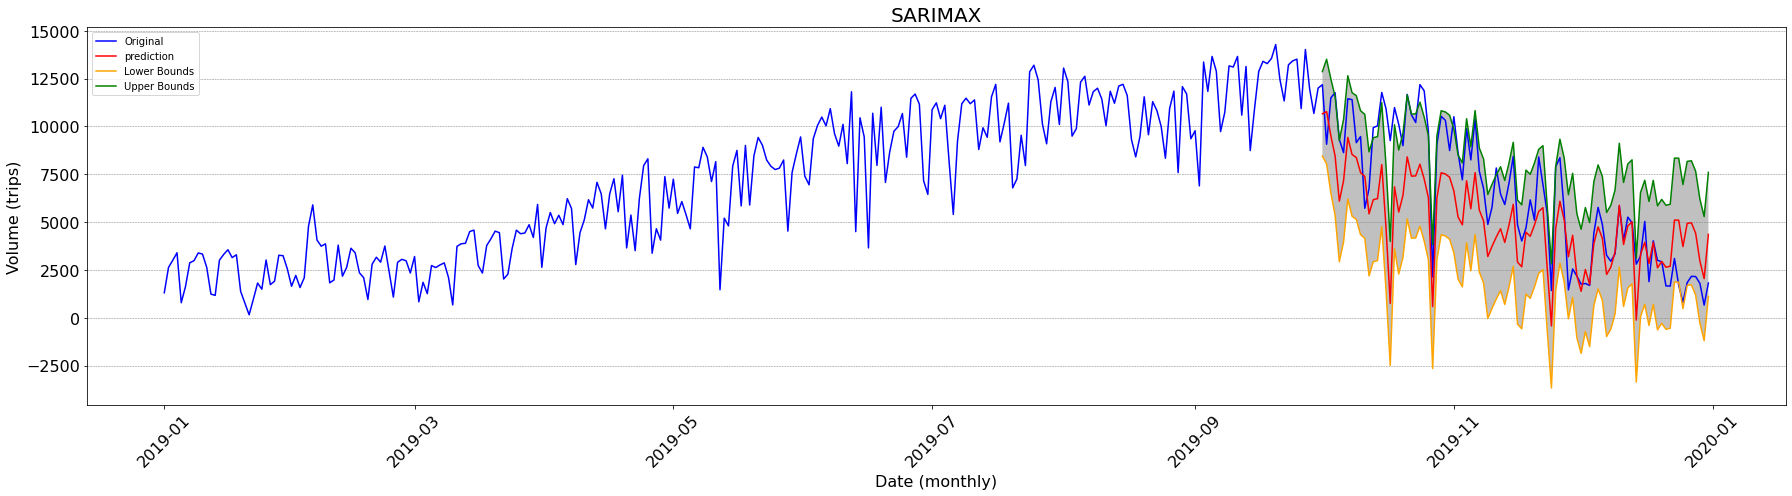

MAPE: 0.4362222118346819
MAD: 2065.216801665083


In [373]:
exog_lst_full = ['Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Mean',
                 'RelativeHumidity_Minimum', 'RelativeHumidity_Maximum', 'RelativeHumidity_Mean',
                 'MeanSeaLevelPressure_Minimum', 'MeanSeaLevelPressure_Maximum', 'MeanSeaLevelPressure_Mean',
                 'PrecipitationTotal_Summation', 'SnowfallAmount_Summation', 'CloudCoverTotal_Mean',
                 'SunshineDuration_Summation', 'Evapotranspiration_Summation',
                 'PBLHeight_Minimum', 'PBLHeight_Maximum', 'PBLHeight_Mean',
                 'WindGust_Minimum', 'WindGust_Maximum', 'WindGust_Mean',
                 'WindSpeed_Minimum', 'WindSpeed_Maximum', 'WindSpeed_Mean',
                 'WindDirection Dominant_None',
                 'GeopotentialHeight_Minimum', 'GeopotentialHeight_Maximum', 'GeopotentialHeight_Mean',
                 'day', 'dayofweek', 'is_workday', 'is_holiday']

result_df, model = sarimax_forecast(df=dataset, exog_lst=exog_lst_full,
                                    start_forecast_date=FORCAST_START_DATE,
                                    end_forecast_date=FORCAST_END_DATE)
arima_plot(result_df, title='SARIMAX')
model_eval(result_df['y_true'], result_df['y_pred'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

 - After introducing exogenous variables to the model, the MAPE increases, the MAD decreases, and the model's predictions become more realistic.
 - The increase of MAPE is partialy because the low MAPE of the previous model is caused by the generally predicted value being lower than the true value. So the higher MAPE here is relatively acceptable.
 - In other words, adding exogenous variables does improve the model effect.


In [358]:
print(model.mle_retvals)

{'fopt': 8.373486516255104, 'gopt': array([ 2.44869014e-05,  1.27897692e-08,  4.23225900e-05, -6.89389879e-05,
        1.20093979e-04, -1.16954979e-04, -3.89289135e-04, -4.59752593e-04,
       -4.10761559e-04,  4.60799398e-05, -3.85281140e-05,  1.51807633e-04,
       -7.76026354e-04, -7.05451697e-05, -1.64280500e-04,  4.03786160e-04,
       -7.48590523e-05, -1.44950718e-05, -7.66455344e-05, -7.12274684e-05,
       -4.53752591e-05, -5.00328667e-05, -9.46016598e-06, -1.02211217e-04,
        3.30533645e-04, -8.31789748e-05,  1.60351554e-04, -2.93479019e-05,
        2.07300843e-07,  3.51732866e-05, -2.29828601e-05, -9.84173809e-04,
        7.32594431e-05]), 'fcalls': 15028, 'warnflag': 1, 'converged': False, 'iterations': 393}


 - Lots of irrelevant exogenous variables cause the model fail to converge.
 - Next, only useful variables are retained to make the model converge while maintaining a good model performance.

In [359]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 y_true   No. Observations:                  272
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2277.588
Date:                Tue, 15 Sep 2020   AIC                           4621.177
Time:                        01:26:14   BIC                           4740.047
Sample:                             0   HQIC                          4668.904
                                - 272                                         
Covariance Type:                  opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Temperature_Minimum           -181.8214     82.227     -2.211      0.027    -342.984     -20.659
Temperature_Maximum           -162.4794     95.886     -1.694      0.090    -

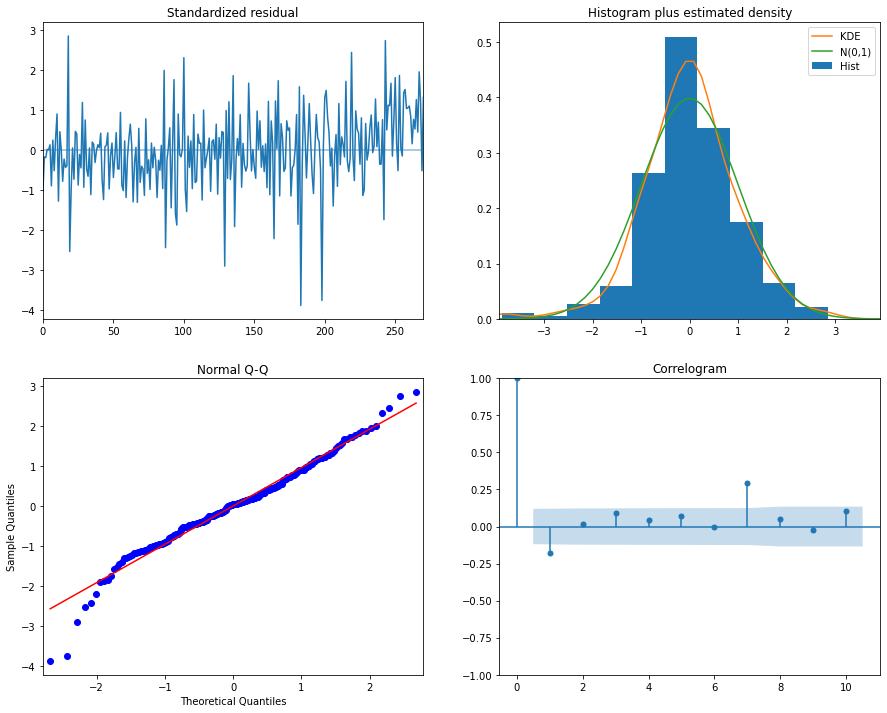

In [360]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

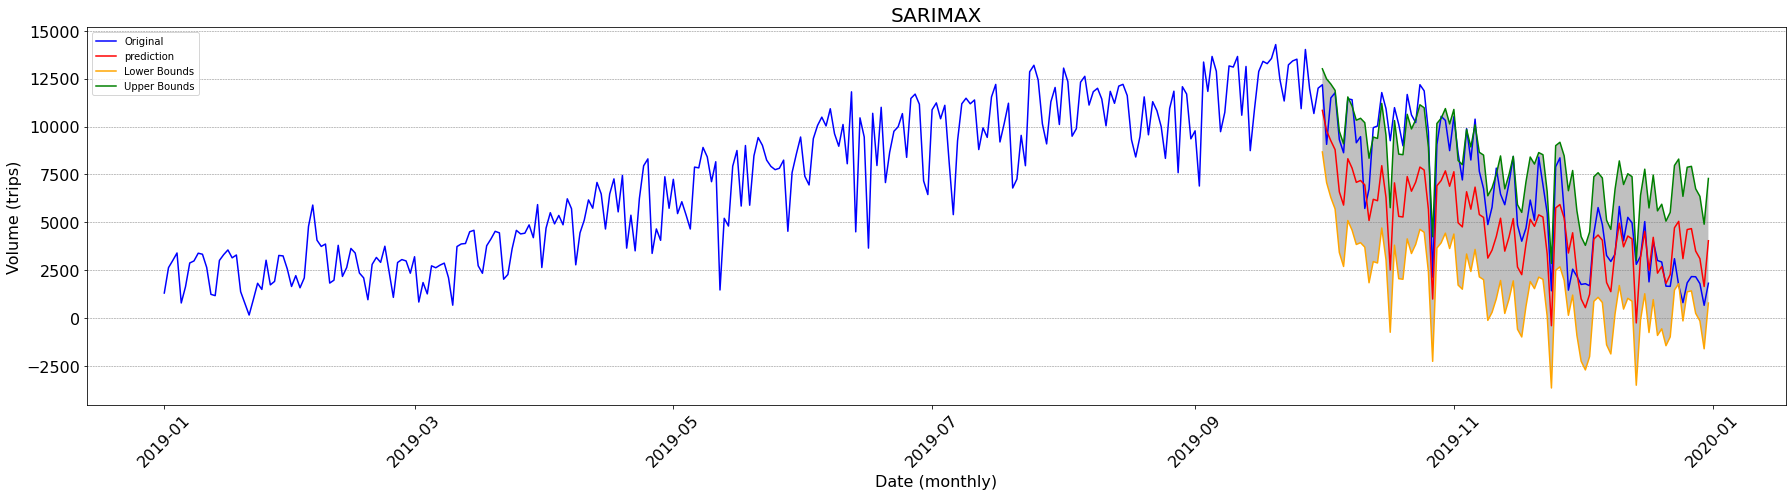

MAPE: 0.4276895150879794
MAD: 2127.852603554388


In [376]:
exog_lst_select = ['Temperature_Mean', 'MeanSeaLevelPressure_Mean', 'PrecipitationTotal_Summation',
                   'Evapotranspiration_Summation', 'WindSpeed_Mean', 
                   'is_workday', 'is_holiday']

result_df, model = sarimax_forecast(df=dataset, exog_lst=exog_lst_select,
                                    start_forecast_date=FORCAST_START_DATE,
                                    end_forecast_date=FORCAST_END_DATE)
arima_plot(result_df, title='SARIMAX')
model_eval(result_df['y_true'], result_df['y_pred'],
           start_date=FORCAST_START_DATE, end_date=FORCAST_END_DATE)

In [377]:
print(model.mle_retvals)

{'fopt': 8.415744474999084, 'gopt': array([-7.47313322e-07,  9.78577219e-06,  4.16910950e-07,  2.93631786e-07,
       -2.29682939e-07,  2.24197550e-05, -1.96093808e-05,  1.32500055e-04,
       -3.19579031e-05]), 'fcalls': 1190, 'warnflag': 0, 'converged': True, 'iterations': 101}


In [379]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 y_true   No. Observations:                  272
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2289.082
Date:                Tue, 15 Sep 2020   AIC                           4596.165
Time:                        01:47:02   BIC                           4628.584
Sample:                             0   HQIC                          4609.182
                                - 272                                         
Covariance Type:                  opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Temperature_Mean               207.1777     17.158     12.074      0.000     173.548     240.807
MeanSeaLevelPressure_Mean        2.9217      0.430      6.788      0.000     

 - The model successfully converged and got better prediction results
 - Useful exogenous variables are:
     - is today workday
     - is today holiday
     - Mean Temperature 
     - Mean MeanSeaLevel Pressure 
     - Precipitation Total Summation
     - Evapotranspiration Summation
     - Mean WindSpeed 

#### 6. [Optional] Focus on the trip data during 2019-01 and 2019-12 only. Now, the client of MSBA & Company wants to understand the key factors that explains the difference in the (average daily) ridership between different pairs of origin and destination. Please explore auxiliary data sets and discuss your findings. [3pts]